In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# # make distances.csv into nearest_neighbors.csv, which is one line for each point where its nearest neighbors are listed in order by their email number (nothing else)
# with open('nearest_neighbors.csv', 'w') as f_out:
#     with open("distances.csv") as f_in:
#         # idx_max = 10
#         # idx_max = len(df_2_2_dist)
#         idx = 0
#         # while idx < idx_max:
#         while True:
#             idx += 1
#             row = f_in.readline().strip()
#             # print(f'beg({row})end')
#             if row == "":
#                 break
#             elements = row.split(sep=';')
#             idx_e_max = len(elements)
#             if elements[-1] == '':
#                 idx_e_max -= 1
#             for idx_e in range(idx_e_max-1):
#                 element = elements[idx_e]
#                 # print(element)
#                 # try:
#                 #     print(eval(element)[0])
#                 # except:
#                 #     print(f'this is causing issues:{element}end')
#                 to_write = eval(element)[0]
#                 f_out.write(f'{to_write},')

#             to_write = eval(elements[idx_e_max-1])[0] # write final element without trailing comma
#             f_out.write(f'{to_write}')
#             f_out.write('\n')

,confidence_positive,correct_class,num_true,num_false,true_pos,false_pos
0,0.95,True,1,0,0.166667,0.00
1,0.85,True,2,0,0.333333,0.00
2,0.80,False,2,1,0.333333,0.25
3,0.70,True,3,1,0.500000,0.25
4,0.55,True,4,1,0.666667,0.25
5,0.45,False,4,2,0.666667,0.50
6,0.40,True,5,2,0.833333,0.50
7,0.30,True,6,2,1.000000,0.50
8,0.20,False,6,3,1.000000,0.75
9,0.10,False,6,4,1.000000,1.00


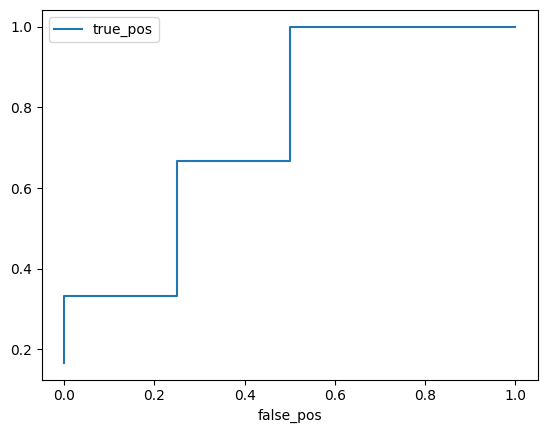

In [4]:
### Problem 1.5

colnames = ["confidence_positive", "correct_class"]
data_5 = [(0.95, True), (0.85, True), (0.8, False), (0.7, True), (0.55, True), (0.45, False), (0.4, True), (0.3, True), (0.2, False), (0.1, False)]
df_5 = pd.DataFrame(data_5, columns=colnames)
df_5['num_true'] = df_5['correct_class'].cumsum()
df_5['num_false'] = (~df_5['correct_class']).cumsum()
df_5['true_pos'] = df_5['num_true'] / df_5['num_true'].max()
df_5['false_pos'] = df_5['num_false'] / df_5['num_false'].max()

df_5.plot(x='false_pos', y='true_pos')
df_5


# for a split, true pos = number of actual pos above split / total actually correct
# false pos = number of false pos above split / total actually negative

# tru pos rate = recall
# false positive rate = false positives / actual negatives
# for each split, calculate the true pos vs false pos rate

In [33]:
### Problem 2
from math import sqrt
from itertools import product

def dist_euclid(v, w):
    # return the euclidean distance between vectors v and w
    return sqrt(sum((w[i]-v[i])*(w[i]-v[i]) for i in range(len(v))))

def knn(k, dist_f, points_train, points_test):
    # return the label of the mode of the k nearest points, ordered by a distance function
    k_nearest_foreach = []
    for i in range(len(points_test)):
        row_test = points_test.iloc[i]
        points_train['x1_test'] = row_test['x1']
        points_train['x2_test'] = row_test['x2']
        points_train['dist'] = points_train.apply(lambda row: dist_f((row['x1'], row['x2']), (row['x1_test'], row['x2_test'])), axis=1)
        k_nearest = points_train.nsmallest(k, columns='dist')
        class_mode = k_nearest["y"].mode()[0]
        # k_nearest_foreach.append(k_nearest)
        # print(f'For test point {list(row_test)}')
        # print(k_nearest)
        # print(f'mode = {class_mode}')
        k_nearest_foreach.append(class_mode)
    return k_nearest_foreach

### 2.1

# Read in training data from dataset
colnames = ['x1', 'x2', 'y']
df_d2z = pd.read_csv("hw3Data-3/D2z.txt", header=None, sep=' ')
df_d2z.columns = colnames

# Create points for scatter plot
range_scatter = [i/10 for i in range(-20, 21, 1)]
points = product(range_scatter, range_scatter)
df_2_1 = pd.DataFrame(points, columns=['x1', 'x2'])

# Obtain knn predictions for points in the scatter plot
# df_2_1['pred'] = knn(1, dist_euclid, df_d2z, df_2_1)
pred_2_1 = knn(1, dist_euclid, df_d2z, df_2_1)
df_2_1['pred'] = pred_2_1
# df_2_1


/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='x1', ylabel='x2'>

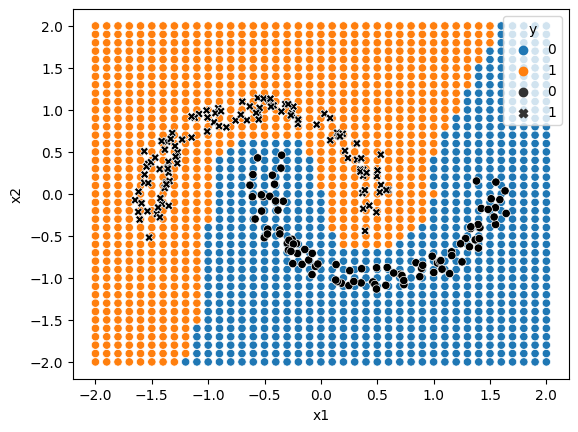

In [35]:
df_2_1
# df_2_1.plot(hue='pred')
fig, axs = plt.subplots()
sns.scatterplot(data=df_2_1, x='x1', y='x2', hue='pred', ax=axs)
sns.scatterplot(data=df_d2z, x='x1', y='x2', style='y', color='black', ax=axs)

In [41]:
### 2.2
df_2_2 = pd.read_csv("hw3Data-3/emails.csv")
df_2_2_features = df_2_2.drop(['Email No.', 'Prediction'], axis=1)
df_2_2_predictions = df_2_2['Prediction']
# df_2_2_predictions
# df_2_2_features
# df_2_2

In [1]:
# RUN THIS ONLY ONCE, STORE RESULTS IN FILE SO THEY DON'T HAVE TO BE COMPUTED AGAIN
# for every email, calculate its distance relative to all emails (even to itself)
# take tuples (email number, prediction, distance) and order by distance
# remove the first tuple (because this should be the email itself)
# store all remaining sorted tuples in a comma-separated list on one line
# do this for all 5000 emails such that we have a .csv with all sorted tuples, can easily take the first k values to do a knn prediction

# distances_matrix
# with open("distances.csv", "w") as f:   
#     for i in range(max_entries):
#         distances = []
#         for j in range(0, max_entries):
#             if i == j:
#                 continue
#             distance = np.linalg.norm(df_2_2_features.iloc[i] - df_2_2_features.iloc[j])
#             entry_tuple = (j, df_2_2_predictions[j], distance)
#             distances.append(entry_tuple)

#         distances.sort(key = lambda x : x[2])
#         for tup in distances:
#             f.write(f'{tup};')
#         f.write('\n')

# # make distances.csv into nearest_neighbors.csv, which is one line for each point where its nearest neighbors are listed in order by their email number (nothing else)
# with open('nearest_neighbors.csv', 'w') as f_out:
#     with open("distances.csv") as f_in:
#         # idx_max = 10
#         # idx_max = len(df_2_2_dist)
#         idx = 0
#         # while idx < idx_max:
#         while True:
#             idx += 1
#             row = f_in.readline().strip()
#             # print(f'beg({row})end')
#             if row == "":
#                 break
#             elements = row.split(sep=';')
#             idx_e_max = len(elements)
#             if elements[-1] == '':
#                 idx_e_max -= 1
#             for idx_e in range(idx_e_max-1):
#                 element = elements[idx_e]
#                 # print(element)
#                 # try:
#                 #     print(eval(element)[0])
#                 # except:
#                 #     print(f'this is causing issues:{element}end')
#                 to_write = eval(element)[0]
#                 f_out.write(f'{to_write},')

#             to_write = eval(elements[idx_e_max-1])[0] # write final element without trailing comma
#             f_out.write(f'{to_write}')
#             f_out.write('\n')

In [3]:
### 2.2 - Implement 1NN, 5-fold cross validation, using 1000 at a time as test set, rest as training. Report accuracy, precision, recall in each fold
# df_2_2_dist = pd.read_csv("distances.csv", header=None, sep=';', dtype=object) # this can take a little while, big file
# df_2_2_dist

df_2_nearest = pd.read_csv("nearest_neighbors.csv", header=None) # this can take a little while, big file
df_2_nearest

,0,1,2,3,4,5,6,7,8,9,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,4596,3537,787,217,1459,2008,87,380,2166,307,...,1791,1790,3967,871,2799,247,1935,411,4904,625
1,463,4739,3405,2219,1352,4366,2576,2218,4631,3467,...,1791,1790,871,3967,2799,247,1935,411,4904,625
2,697,1442,73,553,610,1058,3069,2167,1178,3870,...,1791,1790,3967,871,2799,247,1935,411,4904,625
3,1063,3621,2537,2085,2098,1886,3494,85,2399,831,...,1791,1790,3967,871,2799,247,1935,411,4904,625
4,2138,2437,2399,2767,2883,481,1063,85,641,2599,...,1791,1790,3967,871,2799,247,1935,411,4904,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,337,3406,4371,2138,1831,2377,3107,2872,4373,3142,...,1791,1790,3967,871,2799,247,1935,411,4904,625
4996,4909,4908,2637,681,2415,450,3387,2361,667,3277,...,1791,1790,3967,871,2799,247,1935,411,4904,625
4997,952,323,2732,2836,1278,191,4863,4793,3720,3301,...,1791,1790,3967,871,2799,247,1935,411,4904,625
4998,928,1080,1104,4374,4373,3304,3766,3770,367,4883,...,1791,1790,3967,871,2799,247,1935,411,4904,625


In [14]:
folds_hw = [(0,1000), (1000,2000), (2000,3000), (3000,4000), (4000,5000)]

def knn_cross_valid(k, folds, nn, true_labels):
    # print(f'Using k={k}')
    acc = []
    pre = []
    rec = []
    for beg, end in folds:
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        total = end - beg
        for row_idx in range(beg, end): # test observations
            label_true = true_labels[row_idx]
            nn_row = nn.iloc[row_idx].values
            nn_row_train = nn_row[(nn_row < beg) | (nn_row > end)] # remove elements within testing fold, leaving only training instances
            nn_k_row = nn_row_train[:k]
            nn_k_classes = true_labels[nn_k_row]
            label_pred = nn_k_classes.mode()[0]
            # print(f'label_true={label_true}')
            # print(nn_row)
            # print(nn_row_train)
            # print(f'knn={nn_k_row}')
            # print(f'nn_k_classes={nn_k_classes.values}')
            # print(f'mode={label_pred}')
            # print()
            # true_labels # true labels
            if label_true == 0:
                if label_pred == 0:
                    tn += 1
                elif label_pred == 1:
                    fp += 1
            elif label_true == 1:
                if label_pred == 0:
                    fn += 1
                elif label_pred == 1:
                    tp += 1
        
        accuracy = (tp + tn) / total # what fraction were correctly classified?
        precision = tp / (tp + fp) # what fraction of positives were correct?
        recall = tp / (tp + fn) # what fraction of ground truth trues were recalled? 
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        # print(f'For fold {(beg, end)}, tp={tp/total}={tp}/total, fp={fp/total}={fp}/total, tn={tn/total}={tn}/total, fn={fn/total}={fn}/total, total={total}')
        # print(f'---> accuracy={accuracy}, precision={precision}, recall={recall}')
        # print()
    return pd.DataFrame({'fold': folds, 'accuracy':acc, 'precision':pre, 'recall':rec})
    # , columns=['folds', 'accuracy', 'precision', 'recall']

In [66]:
### 2.2
knn_cross_valid(1, folds_hw, df_2_nearest, df_2_2_predictions)

,fold,accuracy,precision,recall
0,"(0, 1000)",0.825,0.654494,0.817544
1,"(1000, 2000)",0.853,0.685714,0.866426
2,"(2000, 3000)",0.863,0.723404,0.838028
3,"(3000, 4000)",0.851,0.716418,0.816327
4,"(4000, 5000)",0.775,0.605744,0.758170


In [69]:
### 2.4 Run 5-fold cross validation with kNN varying k (k=1, 3, 5, 7, 10). Plot the average accuracy versus k, and list the average accuracy of each case.
k_values = [1,3,5,7,10]
accuracies = []
for k in k_values:
    df_2_4_k = knn_cross_valid(k, folds_hw, df_2_nearest, df_2_2_predictions)
    accuracies.append(df_2_4_k['accuracy'].mean())
    display(df_2_4_k)

,fold,accuracy,precision,recall
0,"(0, 1000)",0.825,0.654494,0.817544
1,"(1000, 2000)",0.853,0.685714,0.866426
2,"(2000, 3000)",0.863,0.723404,0.838028
3,"(3000, 4000)",0.851,0.716418,0.816327
4,"(4000, 5000)",0.775,0.605744,0.758170


,fold,accuracy,precision,recall
0,"(0, 1000)",0.847,0.680328,0.873684
1,"(1000, 2000)",0.851,0.697531,0.815884
2,"(2000, 3000)",0.861,0.727273,0.816901
3,"(3000, 4000)",0.880,0.778846,0.826531
4,"(4000, 5000)",0.774,0.608696,0.732026


,fold,accuracy,precision,recall
0,"(0, 1000)",0.838,0.669421,0.852632
1,"(1000, 2000)",0.850,0.706840,0.783394
2,"(2000, 3000)",0.873,0.752412,0.823944
3,"(3000, 4000)",0.869,0.760383,0.809524
4,"(4000, 5000)",0.779,0.613941,0.748366


,fold,accuracy,precision,recall
0,"(0, 1000)",0.838,0.669421,0.852632
1,"(1000, 2000)",0.862,0.722045,0.815884
2,"(2000, 3000)",0.874,0.753205,0.827465
3,"(3000, 4000)",0.874,0.778146,0.799320
4,"(4000, 5000)",0.778,0.612903,0.745098


,fold,accuracy,precision,recall
0,"(0, 1000)",0.862,0.733333,0.810526
1,"(1000, 2000)",0.870,0.752577,0.790614
2,"(2000, 3000)",0.876,0.781690,0.781690
3,"(3000, 4000)",0.887,0.829091,0.775510
4,"(4000, 5000)",0.781,0.630631,0.686275


In [77]:
df_2_4_final = pd.DataFrame({'k':k_values, 'Average Accuracy':accuracies})
df_2_4_final

,k,Average Accuracy
0,1,0.8334
1,3,0.8426
2,5,0.8418
3,7,0.8452
4,10,0.8552


/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

[Text(0.5, 1.0, 'kNN 5-Fold Cross validation')]

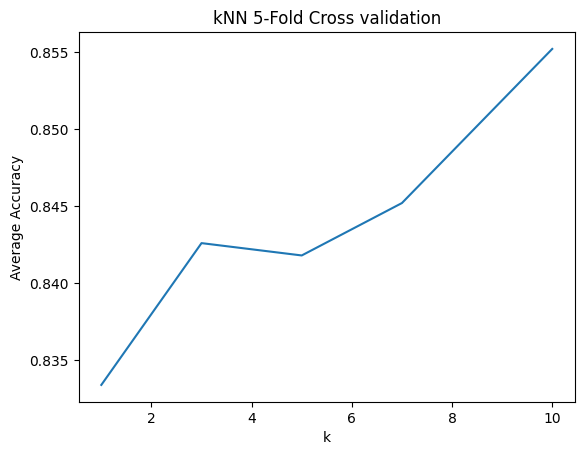

In [78]:
sns.lineplot(data=df_2_4_final, x='k', y='Average Accuracy').set(title='kNN 5-Fold Cross validation')

In [95]:
### 2.3 Implement logistic regression, using gradient descent (see 1.6) to find the optimal parameters. The learning rate might need tuning to find a good optimum.
### Run 5-fols cross validation. Report accuracy, precision, recall in each fold.

def log_reg_train(theta, set_train, set_labels, fold, learning_rate, epochs=3):
    beg, end = fold
    # epochs = 3
    for e in range(epochs):
        for i in range(len(set_train)):
            if i >= beg and i < end: # we do not use observations in the test set
                continue
            row = set_train.iloc[i]
            row_np = np.array(row)
            # print(row_np)
            label_true = set_labels[i]
            theta = theta - learning_rate * row_np * (sigmoid(np.dot(theta, row_np)) - label_true)
    print(f'theta after training:{theta}')
    return theta

def log_reg_test(theta, set_test, set_labels, fold):
    beg, end = fold
    predictions = []
    tn = 0
    fp = 0
    fn = 0
    tp = 0
    total = end - beg
    for i in range(beg, end):
        row = set_test.iloc[i]
        row_np = np.array(row)
        label_true = set_labels[i]
        label_pred = predict_logistic(theta, row_np)
        pred_type = ""
        if label_true == 0:
            if label_pred < 0.5:
                tn += 1
                pred_type = "tn"
            elif label_pred >= 0.5:
                fp += 1
                pred_type = "fp"
        elif label_true == 1:
            if label_pred < 0.5:
                fn += 1
                pred_type = "fn"
            elif label_pred >= 0.5:
                tp += 1
                pred_type = "tp"
        predictions.append((label_pred, label_true))

    accuracy = (tp + tn) / total # what fraction were correctly classified?
    precision = tp / (tp + fp) # what fraction of positives were correct?
    recall = tp / (tp + fn) # what fraction of ground truth trues were recalled? 
                
    return (pd.DataFrame({'accuracy':[accuracy], 'precision':[precision], 'recall':[recall]}), predictions)

def predict_logistic(theta, x):
    return sigmoid(np.dot(theta, x))

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [ ]:
# len(theta_init)
thetas_fit = []
test_results = []
learning_rate_mu = 0.2
df_2_2_features_log = df_2_2_features.copy()
df_2_2_features_log.insert(0, 'constant_term', 1)
train = df_2_2_features_log
test = df_2_2_features_log
labels_true = df_2_2_predictions
for fold in folds_hw:
    # train
    theta_init = np.zeros(len(df_2_2_features.columns)+1)
    theta_init = log_reg_train(theta_init, train, labels_true, fold, learning_rate_mu) # fit theta
    thetas_fit.append(theta_init)

    # test
    results = log_reg_test(theta_init, test, labels_true, fold)
    test_results.append(results)

In [79]:
# thetas_fit
test_results
acc = []
pre = []
rec = []
for stats, predictions in test_results:
    s = stats.iloc[0].values
    acc.append(s[0])
    pre.append(s[1])
    rec.append(s[2])
    # print(stats)

df_2_3 = pd.DataFrame({'fold':folds_hw, 'accuracy':acc, 'precision':pre, 'recall':rec})
df_2_3

,fold,accuracy,precision,recall
0,"(0, 1000)",0.901,0.900862,0.733333
1,"(1000, 2000)",0.821,0.901639,0.397112
2,"(2000, 3000)",0.806,0.941176,0.338028
3,"(3000, 4000)",0.803,0.921739,0.360544
4,"(4000, 5000)",0.845,0.718841,0.810458


In [90]:
### 2.5 Train kNN k=5 and logistic regression on one train/test split. HOWEVER, keep track of how certain each decision was. So to speak, for kNN, keep track of what fraction of neighbors agreed on a decision; for logistic regression, keep track of what the predicted label was.
### For each algorithm, plot what happens as you increase the threshold of how certain your decision was.

# fold_2_5 = (2000,3000)
fold_2_5 = (0,1000)

## kNN model
# train
# test
def knn_ROC(k, folds, nn, true_labels):
    # print(f'Using k={k}')
    predictions = []
    acc = []
    pre = []
    rec = []
    for beg, end in folds:
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        total = end - beg
        for row_idx in range(beg, end): # test observations
            label_true = true_labels[row_idx]
            nn_row = nn.iloc[row_idx].values
            nn_row_train = nn_row[(nn_row < beg) | (nn_row > end)] # remove elements within testing fold, leaving only training instances
            nn_k_row = nn_row_train[:k]
            nn_k_classes = true_labels[nn_k_row]
            label_pred = nn_k_classes.mode()[0]
            number_agree = sum(nn_k_classes[nn_k_classes == label_pred])
            fraction_agree = number_agree / k
            # print(f'label_true={label_true}')
            # print(nn_row)
            # print(nn_row_train)
            # print(f'knn={nn_k_row}')
            # print(f'nn_k_classes={nn_k_classes.values}')
            # print(f'mode={label_pred}')
            # print()
            # true_labels # true labels
            if label_true == 0:
                if label_pred == 0:
                    tn += 1
                    pred_type = 'tn'
                elif label_pred == 1:
                    fp += 1
                    pred_type = 'fp'
            elif label_true == 1:
                if label_pred == 0:
                    fn += 1
                    pred_type = 'fn'
                elif label_pred == 1:
                    tp += 1
                    pred_type = 'tp'
            predictions.append((fraction_agree, label_true))
        
        accuracy = (tp + tn) / total # what fraction were correctly classified?
        precision = tp / (tp + fp) # what fraction of positives were correct?
        recall = tp / (tp + fn) # what fraction of ground truth trues were recalled? 
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        # print(f'For fold {(beg, end)}, tp={tp/total}={tp}/total, fp={fp/total}={fp}/total, tn={tn/total}={tn}/total, fn={fn/total}={fn}/total, total={total}')
        # print(f'---> accuracy={accuracy}, precision={precision}, recall={recall}')
        # print()
    return (pd.DataFrame({'fold': folds, 'accuracy':acc, 'precision':pre, 'recall':rec}), predictions)
    # , columns=['folds', 'accuracy', 'precision', 'recall']

In [91]:
# test
results_knn = knn_ROC(5, [fold_2_5], df_2_nearest, df_2_2_predictions)
results_knn[1]

predictions_knn = sorted(results_knn[1], key= lambda x : x[0], reverse=True)
predictions_knn
colnames = ['certainty', 'prediction type']
df_2_5_knn = pd.DataFrame(predictions_knn, columns=colnames)

## logistic true pos vs false pos rate
# for a split, true pos = number of actual pos above split / total actually correct
# false pos = number of false pos above split / total actually negative

# tru pos rate = recall
# false positive rate = false positives / actual negatives
# for each split, calculate the true pos vs false pos rate

# how many true positives and false negatives we have so far
df_2_5_knn['true_pos'] = df_2_5_knn['prediction type'].cumsum()
df_2_5_knn['false_pos'] = (~df_2_5_knn['prediction type']).cumsum()

df_2_5_knn['ground_pos'] = df_2_5_knn['prediction type'].sum()
df_2_5_knn['ground_neg'] = (~df_2_5_knn['prediction type']).sum()

# what rates we have so far
df_2_5_knn['true_pos_rate'] = df_2_5_knn['true_pos'] / df_2_5_knn['ground_pos']
df_2_5_knn['false_pos_rate'] = df_2_5_knn['false_pos'] / df_2_5_knn['ground_neg']

AUC_knn = df_2_5_knn['true_pos_rate'].sum() / len(df_2_5_knn)
AUC_knn

0.7608701754385966

In [96]:
## logistic regression model
# train
theta_init = np.zeros(len(df_2_2_features.columns)+1)
train = df_2_2_features_log
test = df_2_2_features_log
labels_true = df_2_2_predictions
theta_init = log_reg_train(theta_init, train, labels_true, fold_2_5, learning_rate=0.05, epochs=6) # fit theta

# test
results = log_reg_test(theta_init, test, labels_true, fold)
results[1] # <-- results[1] contains a list of points which can be ordered for our needs
# results[0]
predictions_log = sorted(results[1], key= lambda x : x[0], reverse=True)
predictions_log
colnames = ['certainty', 'prediction type']
df_2_5_log = pd.DataFrame(predictions_log, columns=colnames)
df_2_5_log

## logistic true pos vs false pos rate
# for a split, true pos = number of actual pos above split / total actually correct
# false pos = number of false pos above split / total actually negative

# tru pos rate = recall
# false positive rate = false positives / actual negatives
# for each split, calculate the true pos vs false pos rate

# how many true positives and false negatives we have so far
df_2_5_log['true_pos'] = df_2_5_log['prediction type'].cumsum()
df_2_5_log['false_pos'] = (~df_2_5_log['prediction type']).cumsum()

df_2_5_log['ground_pos'] = df_2_5_log['prediction type'].sum()
df_2_5_log['ground_neg'] = (~df_2_5_log['prediction type']).sum()

# what rates we have so far
df_2_5_log['true_pos_rate'] = df_2_5_log['true_pos'] / df_2_5_log['ground_pos']
df_2_5_log['false_pos_rate'] = df_2_5_log['false_pos'] / df_2_5_log['ground_neg']

AUC_log = df_2_5_log['true_pos_rate'].sum() / len(df_2_5_log)
AUC_log

/tmp/ipykernel_5470/1927434715.py:59: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


theta after training:[ 1.17013595e+01 -5.65116146e+01 -6.46185496e+01 ...  5.00000000e-02
 -6.64207890e+00 -5.00000000e-01]


0.7410510204081634

/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/digesmartin/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

[Text(0.5, 0, 'False Positive Rate (Positive label: 1)'),
 Text(0, 0.5, 'True Positive Rate (Positive label: 1)')]

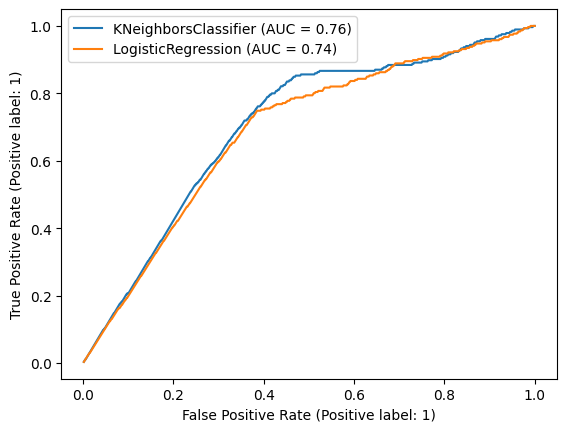

In [93]:
## Plot kNN and logistic models to the same figure
# df_2_5_log.plot(x='false_pos', y='true_pos')
fig, axs = plt.subplots()
p = sns.lineplot(data=df_2_5_knn, x='false_pos_rate', y='true_pos_rate', label=f'KNeighborsClassifier (AUC = {round(AUC_knn, 2)})', ax=axs)
p = sns.lineplot(data=df_2_5_log, x='false_pos_rate', y='true_pos_rate', label=f'LogisticRegression (AUC = {round(AUC_log, 2)})', ax=axs)
axs.legend()
p.set(xlabel="False Positive Rate (Positive label: 1)", ylabel="True Positive Rate (Positive label: 1)")
# .set(title='kNN 5-Fold Cross validation')